In [1]:
# Batuhan Cakir

# Importing Libraires
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os 
from tqdm import tqdm 
from PIL import Image

In [2]:
# Image Data train and test roads
train_x = "/Users/BATUHAN/Desktop/grey-Source/train_set/train_top"
train_y = "/Users/BATUHAN/Desktop/grey-Source/train_set/train_agac"

test_x  = "/Users/BATUHAN/Desktop/grey-Source/test_set/test_top"
test_y  = "/Users/BATUHAN/Desktop/grey-Source/test_set/test_agac"

image_size = (64,64) # Dataset image sizes

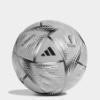

In [3]:
Image.open("/Users/BATUHAN/Desktop/grey-Source/train_set/train_top/images66.jpg")

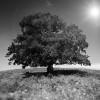

In [4]:
Image.open("/Users/BATUHAN/Desktop/grey-Source/train_set/train_agac/agac.jpg")

In [5]:
# Concatenate function for train and test data 
def data_split(data1, data2):
    data_x = [] 
    data_y =[]
    
    for image1 in tqdm(os.listdir(data1)): 
        path = os.path.join(data1, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size[0], image_size[1]))
        data_x.append(img1) 
        
    for image2 in tqdm(os.listdir(data2)):
        path = os.path.join(data2, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size[0], image_size[1]))
        data_y.append(img2) 
    
    t_data= np.concatenate((np.asarray(data_x),np.asarray(data_y)),axis=0)
    return t_data 

In [6]:
# Calling concatenate function, all data in the numpy matrix
train_data = data_split(train_x, train_y) 
test_data = data_split(test_x, test_y)

100%|██████████| 50/50 [00:00<00:00, 2949.66it/s]


In [7]:
x_data= np.concatenate((train_data, test_data),axis=0)

x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
z1 = np.zeros(450)
o1 = np.ones(450)
Y_train = np.concatenate((o1, z1), axis=0) # Creates (900,1) array for train

z = np.zeros(50)
o = np.ones(50)
Y_test = np.concatenate((o, z), axis=0)    # Creates (100,1) array for test

In [9]:
y_data = np.concatenate((Y_train, Y_test),axis=0).reshape(x_data.shape[0],1)

In [10]:
# Image-Binary Data shapes
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (1000, 64, 64)
Y shape:  (1000, 1)


In [11]:
# Splitting the data train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=42)

number_of_train = x_train.shape[0]
number_of_test  = x_test.shape[0]

In [12]:
# Image-Binary Data flatten shapes
x_train_flatten = x_train.reshape(number_of_train, x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test, x_test.shape[1]*x_test.shape[2])

print("X train flatten", x_train_flatten.shape)
print("X test flatten", x_test_flatten.shape)

X train flatten (900, 4096)
X test flatten (100, 4096)


In [13]:
x_train = x_train_flatten.T
x_test  = x_test_flatten.T
y_test  = y_test.T
y_train = y_train.T
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (4096, 900)
x test:  (4096, 100)
y train:  (1, 900)
y test:  (1, 100)


In [14]:
# Sigmoid function and initialize weights and biases
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(x):
    y_head = 1/(1+np.exp(-x))
    return y_head

In [15]:
# Forward + Backward Propagation function
def forward_backward_propagation(w, b, x_train, y_train):
    
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    
    # backward propagation
    derivative_weight = (np.dot(x_train, ((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    
    return cost,gradients

In [16]:
# Update function calculates costs every iteration and save them after it is plotting costs, returns weights and biasses
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if (i % 100 == 0):
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.figure(figsize=(10,5))
    plt.plot(index,cost_list2, color = 'green', linewidth=2)
    plt.xticks(index, rotation = 'vertical')
    plt.ylabel("Cost", fontsize = 14, loc = "top")
    plt.xlabel("Number of Iterarion", fontsize = 14, loc = "right")
    plt.grid(color='b', linestyle = '--', linewidth = 0.5)
    plt.show()
    return parameters, gradients, cost_list

In [17]:
# Prediction function choses the class 0 or 1 
def predict(w, b, x_test):
    
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [18]:
# Every function is calling in this part, calculates train and test accuracy
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):

    dimension =  x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100, 3)))
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100, 3)))
    return parameters

C:\Users\BATUHAN\AppData\Local\Temp\ipykernel_8016\21811470.py:7: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
C:\Users\BATUHAN\AppData\Local\Temp\ipykernel_8016\21811470.py:7: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


Cost after iteration 0: nan
Cost after iteration 100: 0.828744
Cost after iteration 200: 0.655921
Cost after iteration 300: 0.557842
Cost after iteration 400: 0.498769
Cost after iteration 500: 0.458030
Cost after iteration 600: 0.427469
Cost after iteration 700: 0.403270
Cost after iteration 800: 0.383350
Cost after iteration 900: 0.366471
Cost after iteration 1000: 0.351878
Cost after iteration 1100: 0.339181
Cost after iteration 1200: 0.328474
Cost after iteration 1300: 0.320502
Cost after iteration 1400: 0.315038
Cost after iteration 1500: 0.310343
Cost after iteration 1600: 0.305905
Cost after iteration 1700: 0.301684
Cost after iteration 1800: 0.297659
Cost after iteration 1900: 0.293810
Cost after iteration 2000: 0.290124


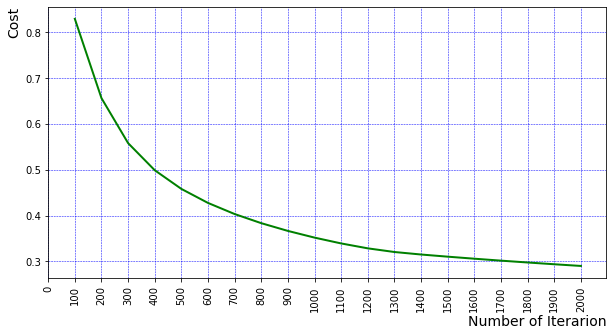

Train Accuracy: 90.444 %
Test Accuracy: 86.0 %


In [19]:
lr_values = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.009, num_iterations = 2001)

In [20]:
lr_values

{'weight': array([[-0.00883481],
        [-0.01367103],
        [-0.0154455 ],
        ...,
        [ 0.028875  ],
        [ 0.0275829 ],
        [ 0.03382235]]),
 'bias': -0.6490420805367478}